In [1]:
% matplotlib inline

import numpy as np
import numpy.ma as ma
import pandas as pd
from math import *
import matplotlib.pyplot as plt
import scipy.io as sio
from mpl_toolkits.basemap import Basemap, cm

import MITgcmutils as mit

/Users/sclayton/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
# import the data to plot
CRindir = '/Volumes/My Passport/coarse_run/'
HRindir = '/Volumes/My Passport/high_res/'

#import grid params for CR grid

in_file = '%sgrid/HFacC.data' % CRindir
HFCR = np.fromfile(in_file, dtype = '>f')
HFCR = HFCR.reshape(23, 160, 360)[0,:,:]

in_file = '%sgrid/XC.data' % CRindir
XC = np.fromfile(in_file, dtype = '>f')
XC[XC>180] = XC[XC>180]-360
XC = XC.reshape(160,360)

in_file = '%sgrid/YC.data' % CRindir
YC = np.fromfile(in_file, dtype = '>f')
YC = YC.reshape(160,360)

in_file = '/Users/sclayton/Documents/darwin_model/eg_grid/RA.data'
RA = np.fromfile(in_file, dtype = '>f')
RA = RA.reshape(160,360)

# import CR data

in_file = '%supflux/CR_WN.1999.data' % CRindir
CRWN = np.fromfile(in_file, dtype='>f').reshape(4,160, 360)
CRmask = ma.masked_where(HFCR == 0, CRWN[0,:,:], copy=False)

#import grid params for HR grid

in_file = '/Users/sclayton/Documents/darwin_model/e2_grid/hFacC.data' 
HFHR = np.fromfile(in_file, dtype = '>f')
HFHR = HFHR.reshape(50, 510,3060)[0,:,:]

in_file = '/Users/sclayton/Documents/darwin_model/e2_grid/XC.data' 
XG = np.fromfile(in_file, dtype = '>f')
XG = XG.reshape(510, 3060)

in_file = '/Users/sclayton/Documents/darwin_model/e2_grid/YC.data' 
YG = np.fromfile(in_file, dtype = '>f')
YG = YG.reshape(510, 3060)

in_file = '/Users/sclayton/Documents/darwin_model/e2_grid/RAC.data' 
RAC = np.fromfile(in_file, dtype = '>f')
RAC = RAC.reshape(510,3060)

# import HR data
in_file = '%supflux/WN.1999.data' % HRindir
HRWN = np.fromfile(in_file, dtype='>f').reshape(4, 510, 3060)
HRmask = ma.masked_where(HFHR == 0, HRWN[0,:,:], copy=False)

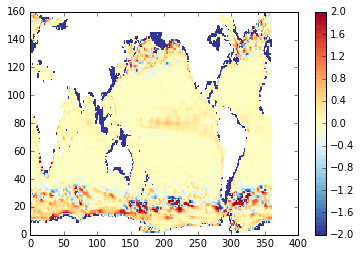

In [13]:

palette = plt.get_cmap('RdYlBu_r', 50)
#plt.pcolormesh(XC-180, YC,XC, shading ='flat')
plt.pcolormesh(CRmask,shading='flat', vmin= -2, vmax = 2, cmap = palette)
#plt.axis([-180, 180, -80, 80])
plt.colorbar()
plt.show()



In [ ]:
palette = plt.get_cmap('RdYlBu_r', 50)
plt.pcolormesh(XG, YG,HFHR,shading='flat', vmin= -2, vmax = 2,cmap = palette)
plt.axis([-180, 180, -80, 80])
plt.colorbar()
plt.show()

In [40]:
# SUBTROPICS - N Hemisphere

HRint = HRWN[1,:,:]*HFHR*RAC
subset = HRint[(YG>10) & (YG<40)]
print 'ECCO2', np.nansum(subset)

CRint = CRWN[1,:,:]*HFCR*RA
subset = CRint[(YC>10) & (YC<40)]
print 'ECCO-Godae', np.nansum(subset)

ECCO2 1.64443e+13
ECCO-Godae 1.54952e+13


In [41]:
# EQUATORIAL UPWELLING

HRint = HRWN[1,:,:]*HFHR*RAC
subset = HRint[(YG>-5) & (YG<5)]
print 'ECCO2', np.nansum(subset)

CRint = CRWN[1,:,:]*HFCR*RA
subset = CRint[(YC>-2) & (YC<2)]
print 'ECCO-Godae', np.nansum(subset)

ECCO2 5.30504e+13
ECCO-Godae 2.12284e+13


In [42]:
# SUBPOLAR - N Hemisphere

HRint = HRWN[1,:,:]*HFHR*RAC
subset = HRint[(YG>40) & (YG<60)]
print 'ECCO2', np.nansum(subset)

CRint = CRWN[1,:,:]*HFCR*RA
subset = CRint[(YC>40) & (YC<60)]
print 'ECCO-Godae', np.nansum(subset)

ECCO2 1.63005e+13
ECCO-Godae 2.83213e+13
